In this note, we will first convert a **third order differential equation** into single order differential equation by augmenting new variables. The third order differential equation considered here is given as follows:
\begin{align}
\frac{d^3\eta}{d\tau^3}=&-\eta\frac{d^2\eta}{d\tau^2}.
\end{align}
We will augment following set of new variables to convert the above third order differential equation into two first oder differentil equations:
\begin{align}
x=\frac{\left[\eta\frac{d\eta}{d\tau}\right]}{\left[\frac{d^2\eta}{d\tau^2}\right]}, y=\frac{\left(\frac{d\eta}{d\tau}\right)^2}{\left[\eta\frac{d^2\eta}{d\tau^2}\right]},\text{and}, t=\log\left|\frac{d\eta}{d\tau}\right|.
\end{align}
To begin with, we first symbolize $\frac{d\eta}{d\tau}=\eta_\tau$ and the second derivative of $\eta$ with respect to $\tau$ as $\eta_{\tau\tau}$.

Differentiation of $x$ with respect to $t$ is $\frac{dx}{dt}$, which eventually can be re-written as $\frac{dx}{dt}=\frac{dx}{d\tau}\cdot\left[\frac{dt}{d\tau}\right]^{-1}$. Therefore,
\begin{align}
\frac{dx}{d\tau}=\frac{\eta_{\tau\tau}(\eta_\tau^2+\eta\eta_{\tau\tau})+\eta^2\eta_{\tau}\eta_{\tau\tau}}{(\eta_{\tau\tau})^2}\quad\text{and}\quad\frac{dt}{d\tau}=\frac{\eta_{\tau\tau}}{\eta_\tau}.
\end{align}
Thus, we see that we have
\begin{align}
\frac{dx}{dt}=&\frac{\eta_{\tau\tau}(\eta_\tau^2+\eta\eta_{\tau\tau})+\eta^2\eta_{\tau}\eta_{\tau\tau}}{(\eta_{\tau\tau})^2}\cdot\frac{\eta_\tau}{\eta_{\tau\tau}}\\
=&\frac{\eta_\tau^3+\eta\eta_\tau\eta_{\tau\tau}+\eta^2\eta_\tau^2}{(\eta_{\tau\tau})^2}\\
=&\frac{\eta\eta_\tau}{\eta_{\tau\tau}}\left[\frac{\eta_\tau^2/\eta+\eta_{\tau\tau}+\eta\eta_{\tau}}{\eta_{\tau\tau}}\right]\\
=&\frac{\eta\eta_\tau}{\eta_{\tau\tau}}\left[\frac{\eta_\tau^2}{\eta\eta_{\tau\tau}}+1+\frac{\eta\eta_\tau}{\eta_{\tau\tau}}\right]\\
\implies\dot{x}=&x\left[y+1+x\right].
\end{align}
Its not hard to see that we employed the quotient rule to determine the derivative of $x$ with respect to $t$ which seems to be little tedious. Therefore, in the pursuit of determining the derivative of $y$ with respect to $t$ we will employ simple logarithmic differentiation. This is done as follows by first recalling the relation of $y$ with $\eta_\tau$. Recall
\begin{align}
y=\frac{\left(\frac{d\eta}{d\tau}\right)^2}{\left[\eta\frac{d^2\eta}{d\tau^2}\right]}\implies\log{y}=&2\log{\eta_\tau}-\log\eta-\log{\eta_{\tau\tau}}.
\end{align}
Then we differentiate $\log{y}$ with respect to $t$ as follows:
\begin{align}
\frac{y_\tau}{y}=&2\frac{\eta_{\tau\tau}}{\eta_\tau}-\frac{\eta_\tau}{\eta}-\frac{\eta_{\tau\tau\tau}}{\eta_{\tau\tau}}\\
\implies y_{\tau}=&\frac{(\eta_\tau)^2}{\eta\eta_{\tau\tau}}\left[2\frac{\eta_{\tau\tau}}{\eta_\tau}-\frac{\eta_\tau}{\eta}-\frac{-\eta\eta_{\tau\tau}}{\eta_{\tau\tau}}\right]\\
=&\frac{(\eta_\tau)^2}{\eta\eta_{\tau\tau}}\left[2\frac{\eta_{\tau\tau}}{\eta_\tau}-\frac{\eta_\tau}{\eta}+\eta\right].
\end{align}
Again, similarly we have
\begin{align}
\frac{dy}{dt}=&\frac{(\eta_\tau)^2}{\eta\eta_{\tau\tau}}\left[2\frac{\eta_{\tau\tau}}{\eta_\tau}-\frac{\eta_\tau}{\eta}+\eta\right]\cdot\frac{\eta_\tau}{\eta_{\tau\tau}}\\
=&\frac{(\eta_\tau)^2}{\eta\eta_{\tau\tau}}\left[2-\frac{(\eta_\tau)^2}{\eta\eta_{\tau\tau}}+\frac{\eta\eta_\tau}{\eta_{\tau\tau}}\right]\\
\implies\dot{y}=&y\left[2-y+x\right].
\end{align}
Therefore, we have now established the augmented relationship and now we will do Python code to understand the phase portrait in the $x-y$ plane.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pylab as pl

In [2]:
def dx_dt(x,t):
  return [x[0]*(x[1]+1+x[0]),x[1]*(2-x[1]+x[0])]

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


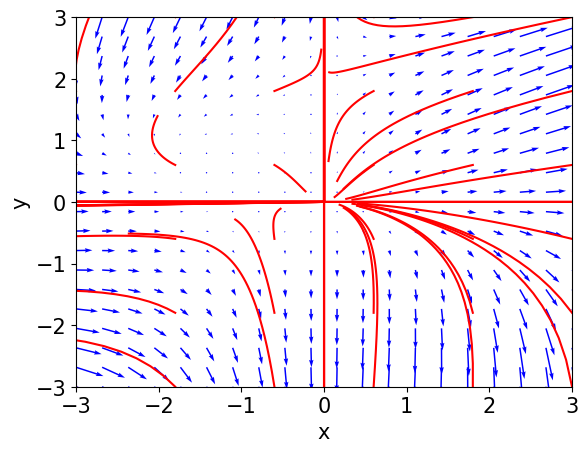

In [3]:
ts=np.linspace(0,-1,50)
ic=np.linspace(-3,3,6)
for r in ic:
  for s in ic:
    x0=[r,s]
    xs=odeint(dx_dt,x0,ts)
    plt.plot(xs[:,0],xs[:,1],"r-")

plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(-3,3)
plt.ylim(-3,3);

X,Y=np.mgrid[-3:3:20j,-3:3:20j]
u=X*(Y+1+X)
v=Y*(2-Y+X)
pl.quiver(X,Y,u,v,color='b')
plt.show()